In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load dataset
df = pd.read_csv("C:\\Project\\HR_Analysis_Predicition\\HR_Attrition_Dataset.csv")

In [3]:
# Drop unnecessary columns
df.drop(columns=['EmployeeID'], inplace=True)

In [4]:
# Encode categorical variables
le = LabelEncoder()
for col in ['Gender', 'Department', 'JobRole', 'OverTime', 'Attrition']:
    df[col] = le.fit_transform(df[col])


In [5]:
# Add Salary Band feature
df['SalaryBand'] = pd.qcut(df['MonthlyIncome'], 4, labels=["Low", "Mid", "High", "Very High"])

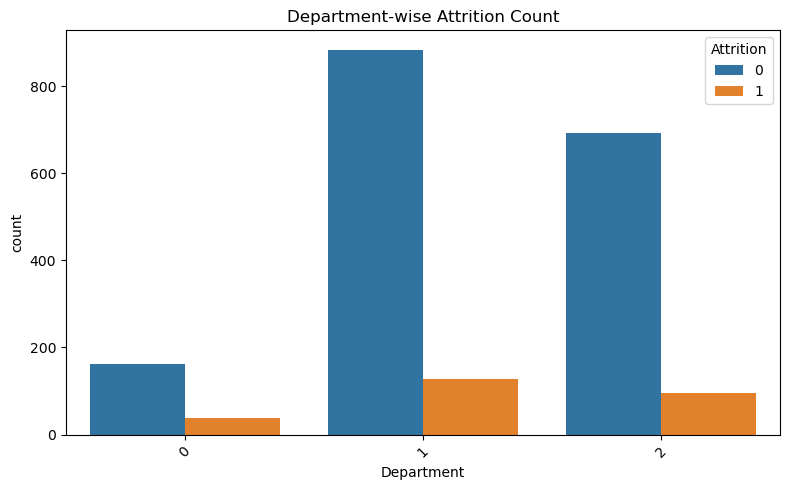

In [6]:
# Save a plot for department-wise attrition
plt.figure(figsize=(8, 5))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Department-wise Attrition Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("department_attrition.png")
plt.show()
plt.close()

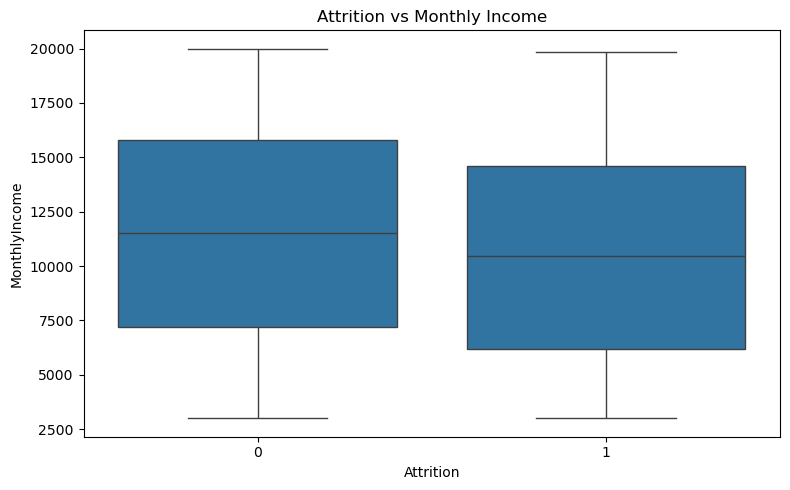

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Attrition vs Monthly Income")
plt.tight_layout()
plt.savefig("income_attrition.png")
plt.show()
plt.close()

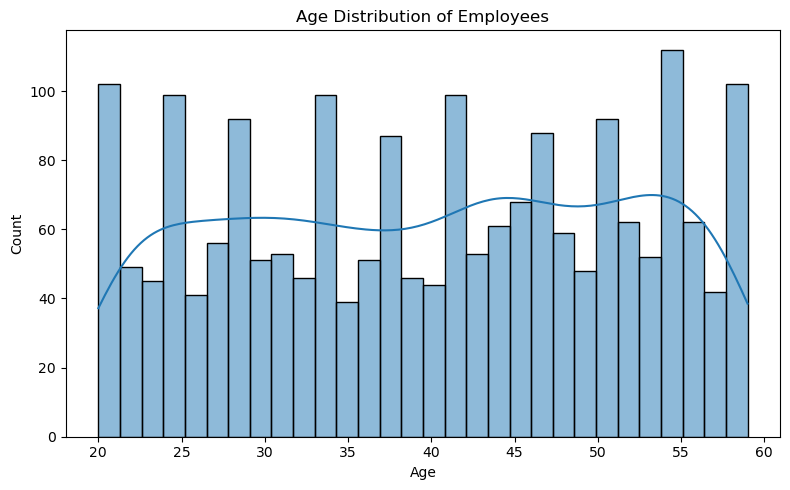

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution of Employees")
plt.tight_layout()
plt.savefig("age_distribution.png")
plt.show()
plt.close()

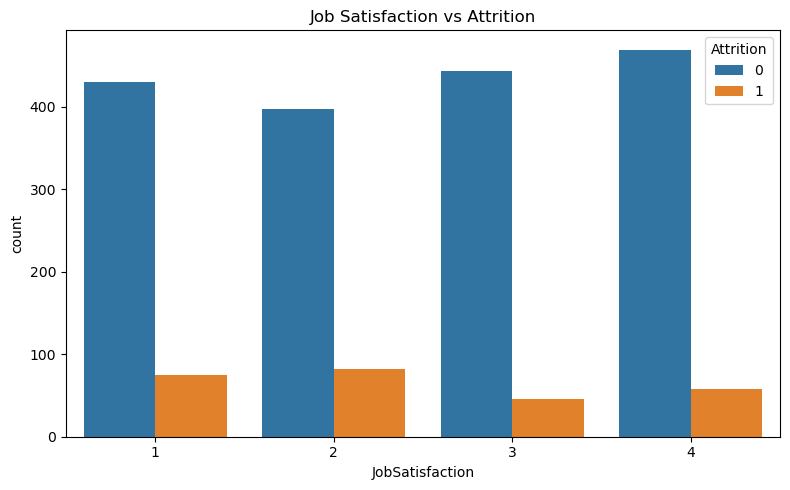

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title("Job Satisfaction vs Attrition")
plt.tight_layout()
plt.savefig("jobsat_attrition.png")
plt.show()
plt.close()

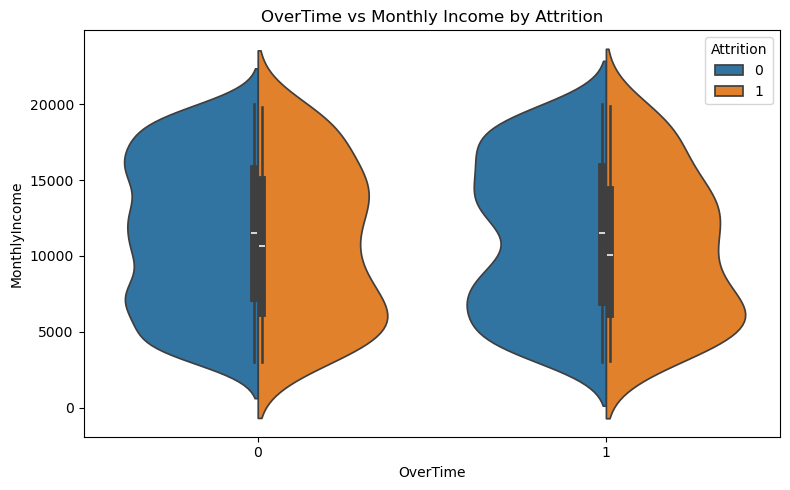

In [10]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='OverTime', y='MonthlyIncome', hue='Attrition', data=df, split=True)
plt.title("OverTime vs Monthly Income by Attrition")
plt.tight_layout()
plt.savefig("overtime_income_attrition.png")
plt.show()
plt.close()

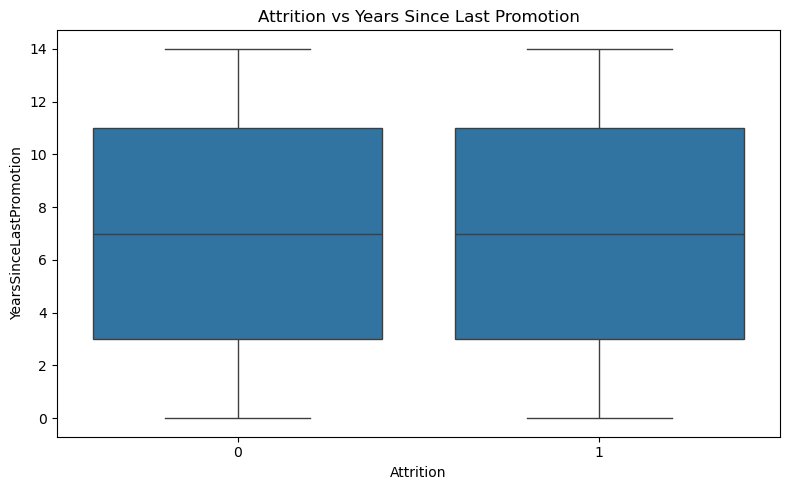

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df)
plt.title("Attrition vs Years Since Last Promotion")
plt.tight_layout()
plt.savefig("promotion_attrition.png")
plt.show()
plt.close()

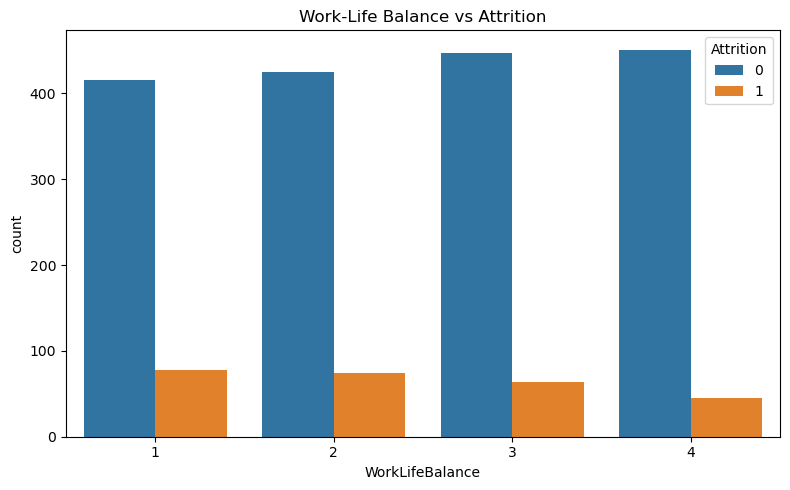

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title("Work-Life Balance vs Attrition")
plt.tight_layout()
plt.savefig("wlb_attrition.png")
plt.show()
plt.close()

In [13]:
# Prepare data for modeling
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [14]:
# Ensure all features are numeric
X = pd.get_dummies(X, drop_first=True)

In [15]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
# Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [18]:
# Train Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


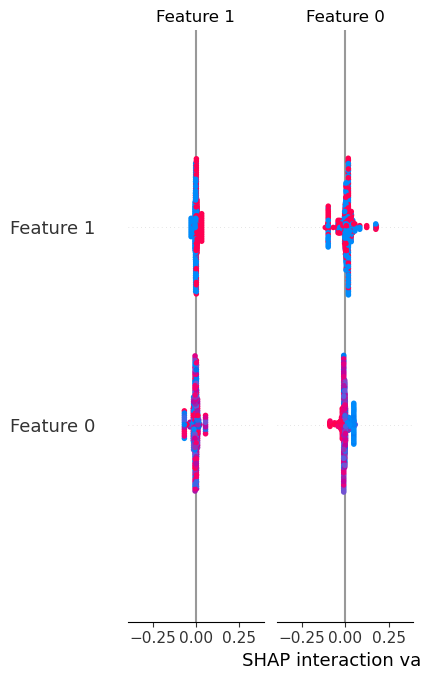

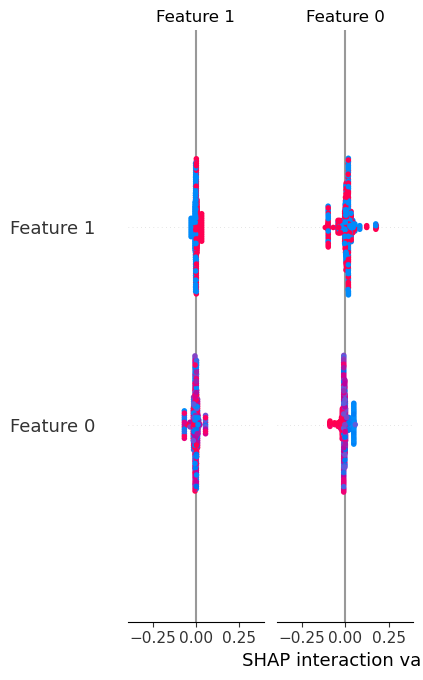

In [19]:
import shap
# Initialize the TreeExplainer
explainer = shap.Explainer(tree_model, X_train)

# Calculate SHAP values for test data
shap_values = explainer(X_test)

# Plot summary of SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")

# For more detailed summary
shap.summary_plot(shap_values, X_test)

In [20]:
# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Logistic Regression Accuracy: 0.8675
[[347   0]
 [ 53   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       347
           1       0.00      0.00      0.00        53

    accuracy                           0.87       400
   macro avg       0.43      0.50      0.46       400
weighted avg       0.75      0.87      0.81       400

Decision Tree Accuracy: 0.8675
[[334  13]
 [ 40  13]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       347
           1       0.50      0.25      0.33        53

    accuracy                           0.87       400
   macro avg       0.70      0.60      0.63       400
weighted avg       0.84      0.87      0.85       400



C:\Users\padma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\padma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\padma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
# Export cleaned data for Power BI
final_df = pd.concat([X, y], axis=1)
final_df.to_csv("C:\\Users\\padma\\OneDrive\\Documents\\Elevate labs\\hr_attrition_powerbi.csv", index=False)
